In [15]:
# First reset the pygkyl library
import sys
!rm -rf ~/personal_gkyl_scripts/pygkyl/pygkyl.egg-info
!rm -rf ~/personal_gkyl_scripts/pygkyl/build
!{sys.executable} -m pip install ~/personal_gkyl_scripts/pygkyl > ~/personal_gkyl_scripts/pygkyl/install.log

import numpy as np
import matplotlib.pyplot as plt
import os

# Configure plotting
plt.rcParams["figure.figsize"] = (6,4)

# Custom libraries and routines
import pygkyl

home_dir = os.path.expanduser("~")
repo_dir = home_dir+'/personal_gkyl_scripts/'
# simdir = repo_dir+'sim_data_dir_example/par_adv_test/'
# fileprefix = 'rt_gk_tcv_nt_iwl_3x2v_p1'
# simdir = 'sim_data_dir_example/3x2v_example/gk_tcv_posD_iwl_3x2v_electron_heating/'
# fileprefix = 'gk_tcv_posD_iwl_3x2v_D02'
simdir = 'sim_data_dir_example/3x2v_example/gk_tcv_nt_high_res_geom/'
fileprefix = 'rt_gk_tcv_nt_iwl_3x2v_p1'
# simdir = 'sim_data_dir_example/2x2v_example/tcv_NTtq/wk/'
# fileprefix = 'gk_tcv_negD_trueq_iwl_2x2v'
simulation = pygkyl.simulation_configs.import_config('tcv_nt', simdir, fileprefix, dimensionality='3x2v')
# simulation = pygkyl.simulation_configs.import_config('d3d_nt', simdir, fileprefix)
# simulation.geom_param.x_LCFS = 0.08

simulation.normalization.set('t','mus') # time in micro-seconds
simulation.normalization.set('x','minor radius') # radial coordinate normalized by the minor radius (rho=r/a)
simulation.normalization.set('y','Larmor radius') # binormal in term of reference sound Larmor radius
simulation.normalization.set('z','pi') # parallel angle devided by pi
simulation.normalization.set('fluid velocities','thermal velocity') # fluid velocity moments are normalized by the thermal velocity
simulation.normalization.set('temperatures','eV') # temperatures in electron Volt
simulation.normalization.set('pressures','Pa') # pressures in Pascal
simulation.normalization.set('energies','MJ') # energies in mega Joules
simulation.normalization.set('gradients','major radius') # gradients are normalized by the major radius

sim_frames = simulation.available_frames['ion_BiMaxwellianMoments'] # you can check the available frames for each data type like ion_M0, ion_BiMaxwellian, etc.)
print("%g time frames available (%g to %g)"%(len(sim_frames),sim_frames[0],sim_frames[-1]))

1 time frames available (0 to 0)


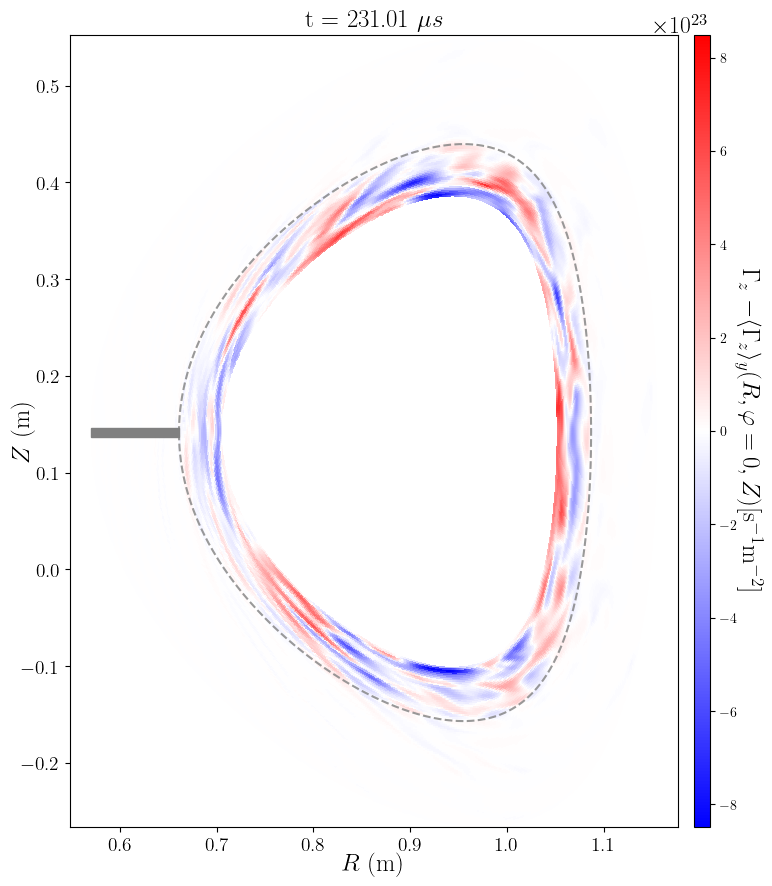

In [13]:
polproj = pygkyl.PoloidalProjection()
polproj.setup(simulation,nzInterp=24)
polproj.plot('pflux_z',timeFrame=sim_frames[-1],colorScale='linear',clim=[],inset=None,fluctuation='yavg')

In [3]:
ghjk

NameError: name 'ghjk' is not defined

In [ ]:
a = ['a','b','c']
a[1:]

['b', 'c']

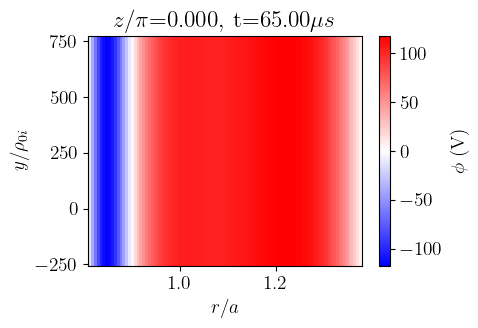

In [ ]:

cut_dir = 'xy' # the plane we want to plot
cut_coord = 0.0 # the coordinate were the plan stands If normalized units are defined, 
time_frame = sim_frames[-1] # the time frame
fieldnames = ['phi'] # the fields to plot, see simulation.display_available_fields() (some may not work in 2x2v)
clim = []
pygkyl.plot_utils.plot_2D_cut(simulation, cut_dir, cut_coord, time_frame,fieldnames,plot_type='pcolormesh',
                              clim=clim)

In [ ]:
torproj = pygkyl.TorusProjection()
torproj.setup(simulation, 
              Nint_polproj=32, # number of interpolation points for the poloidal projection
              Nint_fsproj=24, # number of points along the toroidal direction
              phiLim = [0, 3.14/2], 
              rhoLim = [0,-1]
              )
cam = simulation.geom_param.camera_zoom_2by1
timeFrames = sim_frames[:]
torproj.movie(fieldName='Ti', timeFrames=timeFrames, colorMap='bwr',
              fluctuation='', clim=[-150, 150], logScale=False, cameraPath=cam,
              vessel=False, filePrefix=fileprefix, imgSize=(400,800))

Processed frames: 14/14... 
Movie saved as gk_tcv_negD_trueq_iwl_2x2vtorproj_movie_Ti.gif


In [ ]:
T = 350.736 
N = 1.14876e+22
E = 1.5 * N * T * simulation.species['ion'].q # energy in Joules
print("Total energy in the system: %g MJ"%(E/1e6))

Total energy in the system: 0.968196 MJ


Processing frames: 1/14... 

KeyboardInterrupt: 

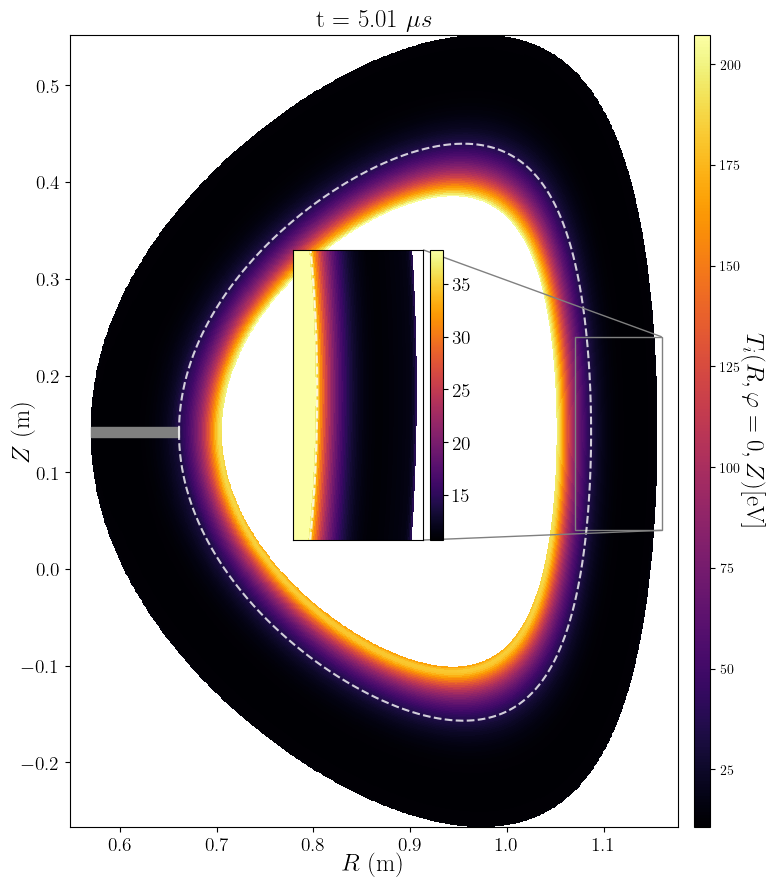

In [ ]:
polproj = pygkyl.PoloidalProjection()
polproj.setup(simulation,nzInterp=32)
polproj.movie('Ti',moviePrefix='mov_example_',timeFrames=sim_frames[:],
              colorScale='linear',)

In [ ]:
torproj = pygkyl.TorusProjection()
torproj.setup(simulation, 
              Nint_polproj=32, # number of interpolation points for the poloidal projection
              Nint_fsproj=16, # number of points along the toroidal direction
              phiLim = [0, 3*3.14/2], 
              rhoLim = [0,-1]
              )

In [ ]:
fieldname = 'Ti'
timeFrame = sim_frames[-1]
logScale = False
clim = [-150,150]
filePrefix = ''
cam = simulation.geom_param.camera_zoom_2by1
jupyter_backend='html' # set to 'trame' if you want to use the jupyter backend
torproj.plot(fieldName=fieldname, timeFrame=timeFrame, colorbar=False, colorMap='bwr',
             fluctuation='',clim=clim, logScale = logScale, jupyter_backend=jupyter_backend,
             vessel=True, filePrefix=filePrefix, imgSize=(800,800), cameraSettings=cam)

EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…

Image saved as torproj_Ti.png


In [ ]:
cam = simulation.geom_param.camera_zoom_2by1
timeFrames = sim_frames[:5]
torproj.movie(fieldName='test', timeFrames=timeFrames, colorMap=[],
              fluctuation='', clim=clim, logScale=logScale, cameraPath=cam,
              vessel=False, filePrefix=fileprefix, imgSize=(400,800))

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' on line 3 (7143957.py, line 4)

In [ ]:
Nint_polproj = 12
Nint_fsproj = 12
torproj = pygkyl.TorusProjection()
torproj.setup(simulation, Nint_polproj=Nint_polproj, Nint_fsproj=Nint_fsproj, 
              phiLim = [0, 3*np.pi/2], rhoLim = [2,-2])

In [ ]:
c0 = simulation.geom_param.camera_global
c1 = simulation.geom_param.camera_zoom_lower

camera_path = [c0, c0, c1, c1]
time_frames = sim_frames[:3]
torproj.movie(fieldName='Te', timeFrames=time_frames, fluctuation='yavg_relative', filePrefix='fullsim_',
              cameraPath=camera_path, logScale=False, clim=[-20,20])

In [ ]:
def qprofile(rIn):
    qa = [497.3420166252413,-1408.736172826569,1331.4134861681464,-419.00692601227627]
    # qa = [0, 0, 1.5, 0.0]
    R = rIn + simulation.geom_param.R_axis
    return (qa[0]*R**3 + qa[1]*R**2 + qa[2]*R + qa[3])
    # return 2
simulation.geom_param.set_qprofile(qprofile)

polproj = pygkyl.PoloidalProjection()
polproj.setup(simulation,nzInterp=16, gridCheck=False, TSBC=True, zExt=True)

In [ ]:
fieldname = 'ni'
xcut = 0.95
Nint = 128
overSampFact = 1
pygkyl.plot_utils.flux_surface_proj(simulation, fieldName=fieldname, xCut=xcut, timeFrame=0, Nint=Nint, overSampFact=overSampFact)

In [ ]:
# polproj.inset.xlim = [0.65,0.75]
# polproj.set_toroidal_rotation(0*np.pi)
# polproj.plot('ni',timeFrame=sim_frames[0],colorScale='lin',fluctuation='',clim=[],colorMap='',inset=False)

In [ ]:

# Create a 2x1 figure for combined plots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the q-profile
axs[0].set_xlabel('R (m)')
axs[0].set_ylabel('q-profile')
axs[0].plot(R, qprofile_TCV(r,ctx), '-k', label='TCV')
axs[0].plot(R, qprofile_lowshear(r,ctx), '-b', label='low shear ')
axs[0].plot(R, qprofile_highshear(r,ctx), '-r', label='high shear')
eta = 0.675
axs[0].plot(R, qprofile_intermediate(r,ctx), '-g', label='mix (eta=%.2f)'%eta)
eta = 0.676
axs[0].plot(R, qprofile_intermediate(r,ctx), '--y', label='mix (eta=%.2f)'%eta)
axs[0].grid()

# Plot the shear
axs[1].set_xlabel('R (m)')
axs[1].set_ylabel(r'Shear $r/q \partial_r q$')
axs[1].plot(R, shear(r, qprofile_TCV, ctx), '-k', label='TCV')
axs[1].plot(R, shear(r, qprofile_lowshear, ctx), '-b', label='low shear ')
axs[1].plot(R, shear(r, qprofile_highshear, ctx), '-r', label='high shear')
eta = 0.675
axs[1].plot(R, shear(r, qprofile_intermediate, ctx), '-g', label='mix (eta=%.2f)'%eta)
eta = 0.676
axs[1].plot(R, shear(r, qprofile_intermediate, ctx), '--y', label='mix (eta=%.2f)'%eta)
axs[1].grid()

# Plot the shift function
axs[2].set_xlabel('R (m)')
axs[2].set_ylabel(r'Shift function $S(x)/L_y$')
axs[2].plot(R, shift(x, qprofile_TCV, ctx)/ctx.Ly, '-k', label='TCV')
axs[2].plot(R, shift(x, qprofile_lowshear, ctx)/ctx.Ly, '-b', label='low shear ')
axs[2].plot(R, shift(x, qprofile_highshear, ctx)/ctx.Ly, '-r', label='high shear')
eta = 0.675
axs[2].plot(R, shift(x, qprofile_intermediate, ctx)/ctx.Ly, '-g', label='mix (eta=%.3f)'%eta)
eta = 0.676
axs[2].plot(R, shift(x, qprofile_intermediate, ctx)/ctx.Ly, '--y', label='mix (eta=%.3f)'%eta)
axs[2].grid()

# Add a single legend outside the last plot
handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=6)

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

In [ ]:
etas = np.linspace(0.6, 0.7, 100)
shifts = [np.min(shift(x, lambda r, ctx: (1 - eta) * qprofile_lowshear(r, ctx) + eta * qprofile_highshear(r, ctx), ctx) / ctx.Ly) for eta in etas]
plt.plot(etas, np.abs(shifts), '-')
# plot vertical line at eta=0.675
plt.axvline(x=0.675, color='k', linestyle='--')
# plot horizontal line at the shift value when eta=0.675
idx = np.argmin(np.abs(etas - 0.675))
plt.axhline(y=np.abs(shifts[idx]), color='k', linestyle='--')
plt.xlabel('eta')
plt.ylabel('Minimum shift')

In [ ]:
eta = [  0.5,   0.65,  0.675, 0.676,   0.677,   0.68,    0.7,  0.71,  0.72,  0.725,   0.73,   0.74,  0.75,    0.76,   0.8,   0.85,   0.9,  0.95,   1.0]
err = [1e-13,  1e-13,  1e-13, 0.0012, 0.0034, 0.0058, 0.0058, 0.006, 0.0062, 0.0015, 0.0063, 0.006, 0.0032, 0.0042, 0.005, 0.0077, 0.0145, 0.023, 0.035]
fig, ax = plt.subplots()
ax.semilogy(eta, [100*e for e in err], '.--')
ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'error [\%]')
ax.set_title('Error of the twist-and-shift')
ax.grid()
ax.set_ylim(0, 4)
ax.set_xlim(0.5, 1.0)
plt.show()

In [ ]:
import numpy as np
kappa = 1.3
delta = -0.2
q0 = 1.4
qa = 2.5
a = 0.9
R0 = 1.2

def q(r):
    return q0 + (qa - q0) * (r/a)**2

def s(r):
    return 2/a * (qa - q0) * (r/a)

Sma = [0, 0, 0,-a*(kappa-1)/(kappa+1), a*delta/4]

def S(m,r):
    return Sma[m] * np.power(r/a,m-1) * (q(r)*s(r) + 2*q0*(m+1)/(m-1))/(qa*s(a) + 2*q0*(m+1)/(m-1))

def Rc(r,theta):
    sum1 = 0
    sum2 = 0
    for m in [2,3]:
        sum1 += S(m,r)/R0 * np.cos((m-1)*theta)
        sum2 += (1-m)/(2*r*R0)*(S(m,r))**2 * np.cos(theta)
        
    return R0 * (1 + r/R0*np.cos(theta) + sum1 - sum2)
    
def Zc(r,theta):
    sum1 = 0
    sum2 = 0
    for m in [2,3]:
        sum1 += S(m,r)/R0 * np.sin((m-1)*theta)
        sum2 += (1-m)/(2*r*R0)*(S(m,r))**2 * np.sin(theta)
        
    return R0*(r/R0*np.sin(theta) - sum1 - sum2)

def RcTB(r,theta):
    return R0 \
            + r*np.cos(theta) \
            + r*(kappa-1)/(kappa+1)*(q(r)*s(a) + 6*q0)/(qa*s(a) + 6*q0)*np.cos(theta) \
            + delta*r**2/(4*a)*(q(r)*s(a) + 4*q0)/(qa*s(a) + 4*q0)*np.cos(2*theta)
            
def ZcTB(r,theta):
    return r*np.sin(theta) \
        - r*(kappa-1)/(kappa+1)*(q(r)*s(a) + 6*q0)/(qa*s(a) + 6*q0)*np.sin(theta) \
        - delta*r**2/(4*a)*(q(r)*s(a) + 4*q0)/(qa*s(a) + 4*q0)*np.sin(2*theta)
        
r = np.linspace(0.1, a, 100)
theta = np.linspace(0, 2*np.pi, 100)

R_vals = np.zeros((len(r), len(theta)))
Z_vals = np.zeros((len(r), len(theta)))
for i in range(len(r)):
    for j in range(len(theta)):
        R_vals[i,j] = Rc(r[i], theta[j])
        Z_vals[i,j] = Zc(r[i], theta[j])
        
# Tess version
R_valsTB = np.zeros((len(r), len(theta)))
Z_valsTB = np.zeros((len(r), len(theta)))
for i in range(len(r)):
    for j in range(len(theta)):
        R_valsTB[i,j] = RcTB(r[i], theta[j])
        Z_valsTB[i,j] = ZcTB(r[i], theta[j])
# Plot the results
plt.figure()
for n in range(len(r))[::10]:
    plt.plot(R_vals[n,:], Z_vals[n,:],'b-')
    plt.plot(R_valsTB[n,:], Z_valsTB[n,:],'r-')
    
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
plt.title('Magnetic geometry')
plt.axis('equal')
plt.show()

plt.figure()
# plot q profile and shear
plt.subplot(2,1,1)
plt.plot(r, q(r), 'b-', label='q-profile')
plt.plot(r, s(r), 'r-', label='shear')

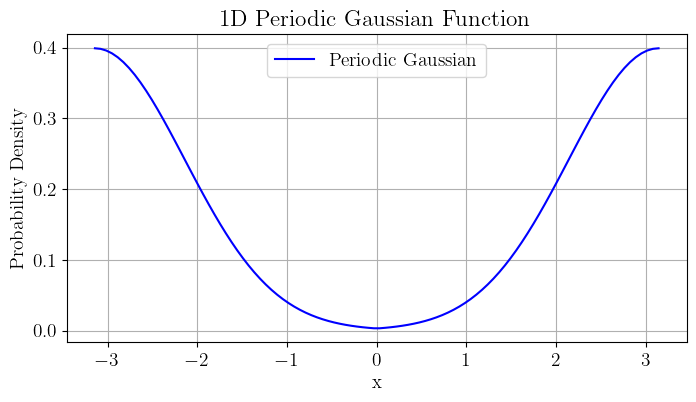

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a periodic gaussian in 1D using modulo for periodicity
def periodic_gaussian_1d(x, mu, sigma, period):
    """
    Compute a 1D periodic Gaussian using modulo to wrap x into the periodic domain.

    This version wraps x-mu into [0, period) and centers the Gaussian at mu, 
    ensuring periodicity without explicit image summation.
    """
    # Shift x so that mu is at the center, then wrap into [0, period)
    dx = x - mu
    dx = ((dx + period/2) % period) - period/2
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (dx / sigma) ** 2)

# Define parameters
mu = -np.pi  # Mean
sigma = 1.0  # Standard deviation
period = 2.0*np.pi  # Period of the domain
x = np.linspace(-np.pi, np.pi, 100)

# Calculate the periodic gaussian values
y = periodic_gaussian_1d(x, mu, sigma, period)

# Plot the periodic gaussian
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Periodic Gaussian', color='blue')
plt.title('1D Periodic Gaussian Function')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid()
plt.legend()
plt.show()